# Data Analysis on Dlight Community Data Sets and Prediction of Condemed Building

## Introduction 
In this project, I analyzed the violation, crime, demolished buliding and 311call data sets from 2015 to 2016 of Downtown Detroit to acheived the following goals:
    1. Cluster the entries from the data sets based on the geological information into demolished and undemolished "buildings" 
    2. Based on the information associated with the building, build machine learning models to prediction the status of buildings, blighted or not. 
To acheived the first goal, I implemented the density-based spatial clustering of applications with noise (DBSCAN) method upon the latitude and longetude information to cluster the entrices into buildings.
For the second goal, I engineered features obatained from the data sets and associate them with the buildings. Then I used machine learning methods including support vector machines and adaboost methods to build a supervised learning modle. 


## Using DBSCAN to Establish the building list

I use the DBSCAN function in the Scikit-learn package in python to implement the clustering. Before the clustering, the four data sets are imported into python environment by using the Pandas package and cleaned to drop corrupted entries. I noticed that a lot of entries in the demolished buiding data sets are missing the geocoordinate information. Therefore, Google MAP API are used to recover the geoinformation from the stress address associate with these entries. 
Two parameters needs to be specified in DBSCAN including, \epsilon the distance between two points in a cluster and $n_{sp}$, the min number of points in a cluster. After testing several choices for the two parameters, I decided to set, $\epsilon = 10 meter$ and $n_{sp} = 6$. This combination leads to a set of $\sim 16,000$ buildings, the number of which is much reduced comparing with about $500,000$ entries in the original four data sets. In the following images, the origninal entries are represented as small black dots on the lat vs. lng map while the green spots in the first image are the clustered building contains no demolition event and thus are regarded as the undemolised buildings. In the second image, the red spots represents build with at least one demolition event and thus are regarded at the demolished buildings.


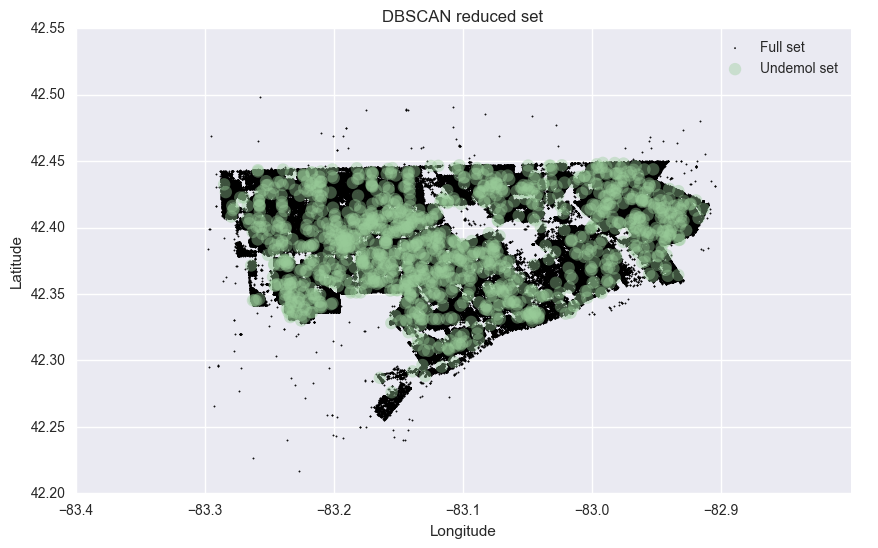

In [6]:
from IPython.display import Image
Image(filename='./undemol_map.png')

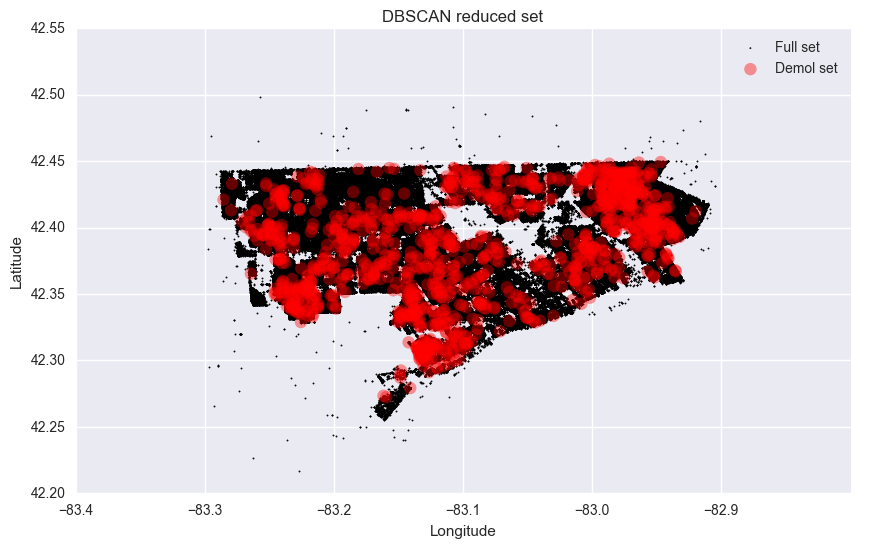

In [7]:
Image(filename='./demol_map.png.png')

## Data Analysis and Machine Learing upon the Clustered Buildings 

Firstly, I analysis the number of events, including the violation, call311 and crime events associate with each cluster and calculated the histograms of each type. In the following image, the histogram of the event from demolished and undemolished buidings are presented and compared.

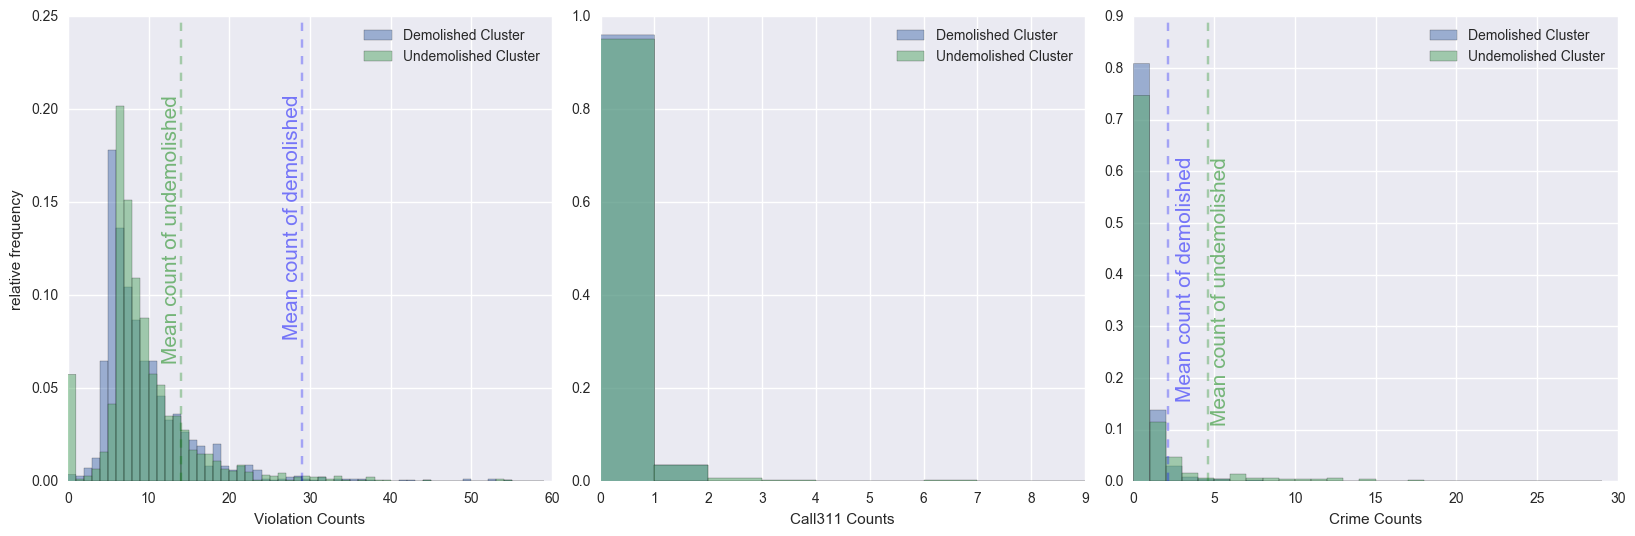

In [8]:
Image(filename='./hist_type_count.png')

In the above image, the mean count of event shows significant difference between the demolish and undemolished building in the violation cases. However, this difference becomes smaller when comes to the crime event. Finally, the mean values of the counts in 311 Call event is almost indistinguishable between the two type of buildings.


To Further explore the temporal properties of the three types of events and study how the these properties would be different between the demolished and undemolished buildings, I analyzed the averaged distributions of the events observed over a day (0:00 am to 23:00pm) and plotted them in the following image, where the distributions from each building are shown in lines with transparent colors while the avergaed distributions are shown in soild lines.

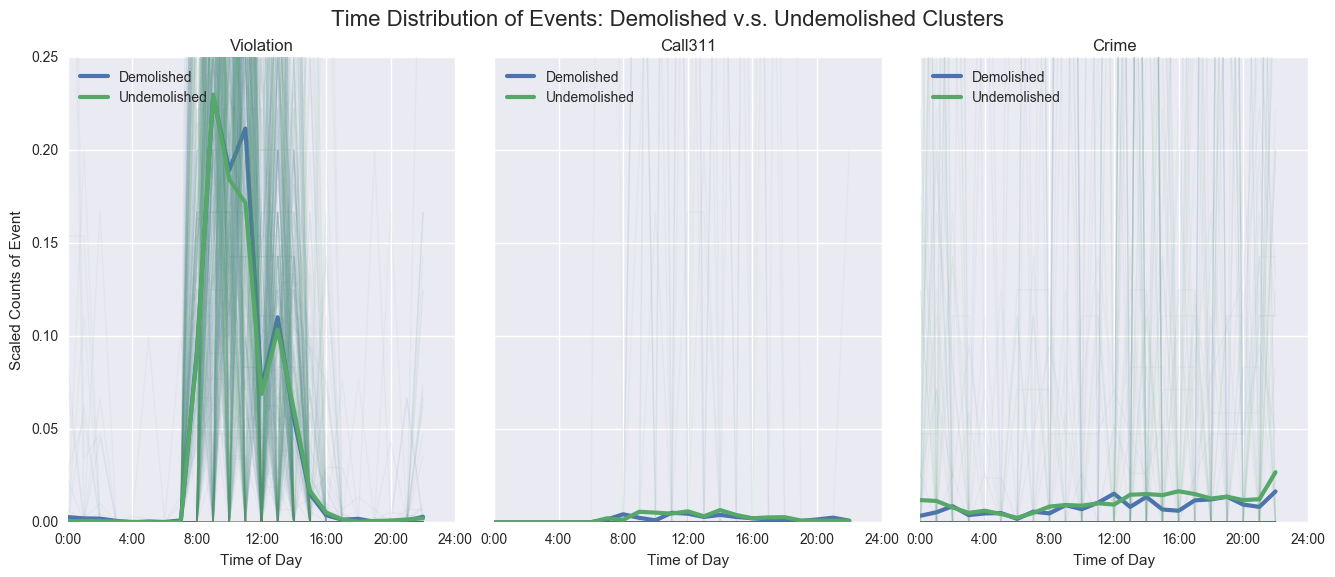

In [9]:
Image(filename='./comp_hourly_event.png')

According to the above image, the time distribution of violation over a day shows three peaks for the demoslihed buildings, around $9$ am, $11$ am and $1$ pm, while for the undemolished building the peak around $11$ pm is missing. A minor difference is that the distribution shows slightly increament near the midnight for demolished building compared with no big changes in the distribution of undemolished buildings.  When comes to the 311 Call events, I notice that the averaged call311 distributions for both the building types are of very small magnitude. This might come from the fact that the total number of entries in the call311 data sets is only about $10,000$, which means that a certain number of building might have no call311 events. Small difference can be observed in the averaged crime distributions, where the demolished buildlings show less crime counts near mid-night and in the afternoon ($1$ pm ~$5 $pm). 

Next, I used the aboved analyzed data sets to set up  machine learning models to predict whether the builidng is blighted (demolished) or not. Here, the label $y = 1$ if the building demolished while $y =0$ if the building is undemolished. The first model I consider here is a supported vector machine (SVM) model where three features, the counts of violation, crime  and call311 event are included. Thus the matrix $X$ has three columes and its rows represents the buildings. To train the model, I use all the demolished buildings (about $1,400$) and randomly selected the same number of undemolished buildings. Then five fold cross-validation (5fd CV) are performed on the trained model to optimized the parameter used in the SVM model and estimate the model's accuracy. This model yeilds a accuracy about $62\%$. 

The second model I made here, is an Adaboost model where an ensemble of 50 decision tree model with two level depths are combined to make the prediction.  The X matrix here consisted of 69 columes which are comes from the three time distributions in the above figures. The model is optimized using the same 5fd CV and exhibit an accruacy of $60\%$

Finally to combined the above two model, I used a simple stratgy that a logistic regression model is used,
$$
\begin{align}
y_{mix} = \frac{1}{1+e^{-w_1 y_{SVM} - w_2 y_{ADA} -w_0}},
\end{align}
$$
where $y_{SVM}$, and $y_{ADA}$ are preditions from the SVM and adaboost models discussed in the above. After training, the logistic model gives a accuracy about $63\%$ according to the 5fd CV.



##  Python Scripts 
The raw scripts obtaining the above results can be refered from the github repo at:
